
To address RQ1, we ran a Topic Modeling, unsupervised learning. We built a basic topic model using Gensim’s LDA and MALLET. Then, we built mallet’s LDA implementation. You saw how to find the optimal number of topics using coherence scores.


In [ ]:
!pip install --user -U regex

In [ ]:

## https://github.com/maria-antoniak/little-mallet-wrapper
## https://github.com/rsreetech/LDATopicModelling
## https://github.com/shingkid/data-mining-suicide-sg/

## The provided code in the following is used from the above URLs:

# Run in python console
import sys
import nltk;
nltk.download('stopwords')

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\argha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- For Topic Modeling we used Gensim library
- For lemmatization we used spaCy

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy


import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Import Dataset NotebookProjects
df = pd.read_csv(r'path/to/Data/NotebookProjectsdata_English.csv')


In [ ]:
# Convert to list
data = df.issue_content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', str(sent)) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

#data = [re.sub('\S+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases. 

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)


['Links terminal react hover clicked-think issue past week links displayed '
 'terminal clicked open new tab Today react mouse hover showing underline '
 'cursor change clicked clicking image']
[['links', 'terminal', 'react', 'hover', 'clicked', 'think', 'issue', 'past', 'week', 'links', 'displayed', 'terminal', 'clicked', 'open', 'new', 'tab', 'today', 'react', 'mouse', 'hover', 'showing', 'underline', 'cursor', 'change', 'clicked', 'clicking', 'image']]


In [ ]:
# Define functions for stopwords, bigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

    
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

print("Data:", data_words_bigrams)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])


# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

C:\Users\argha\AppData\Roaming\Python\Python38\site-packages\spacy\util.py:865: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Data: [['links', 'terminal', 'react', 'hover', 'clicked', 'think', 'issue', 'past', 'week', 'links', 'displayed', 'terminal', 'clicked', 'open', 'new', 'tab', 'today', 'react', 'mouse', 'hover', 'showing', 'underline', 'cursor', 'change', 'clicked', 'clicking', 'image'], ['slate', 'update', 'toc', 'syncstring', 'undefined', 'saw', 'tabbed', 'open', 'slate', 'md', 'editor', 'opened', 'toc', 'screenshot'], ['sagews', 'help', 'questionmark', 'work', 'ends', 'errors', 'useful', 'output', 'know', 'related', 'recent', 'end', 'updates', 'newer', 'version', 'sage', 'maybe', 'screenshot', 'took', 'linux', 'workaround', 'outputs', 'help', 'text'], ['missing', 'icon', 'pending', 'starting', 'project', 'starting', 'project', 'starts', 'pending', 'pending', 'missing', 'icon'], ['missing', 'icons', 'purchases', 'subscriptions', 'looks_like', 'battery', 'icons', 'stripe', 'screenshot'], ['html', 'iframe', 'reload', 'button', 'shows', 'sync', 'icon', 'icon', 'circular', 'arrow', 'meaning', 'refresh', 

[[('change', 1),
  ('click', 4),
  ('cursor', 1),
  ('display', 1),
  ('hover', 2),
  ('image', 1),
  ('issue', 1),
  ('link', 2),
  ('mouse', 1),
  ('new', 1),
  ('open', 1),
  ('past', 1),
  ('react', 2),
  ('show', 1),
  ('tab', 1),
  ('terminal', 2),
  ('think', 1),
  ('today', 1),
  ('underline', 1),
  ('week', 1)]]

In [ ]:
# Build LDA model baseline 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the baseline topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.048*"com" + 0.041*"file" + 0.031*"tab" + 0.030*"open" + 0.024*"editor" + '
  '0.022*"png" + 0.020*"text" + 0.018*"browser" + 0.016*"menu" + 0.016*"new"'),
 (1,
  '0.057*"blob" + 0.041*"pull" + 0.033*"documentation" + 0.020*"depend" + '
  '0.019*"download" + 0.018*"merge" + 0.015*"plot" + 0.012*"fromgithub" + '
  '0.012*"wheel" + 0.011*"super"'),
 (2,
  '0.093*"cell" + 0.040*"output" + 0.033*"code" + 0.032*"widget" + '
  '0.020*"mode" + 0.018*"line" + 0.017*"type" + 0.015*"edit" + 0.011*"clear" + '
  '0.010*"allow"'),
 (3,
  '0.049*"asset" + 0.049*"terminal" + 0.021*"com" + 0.021*"design" + '
  '0.019*"update" + 0.019*"release" + 0.018*"panel" + 0.015*"folder" + '
  '0.015*"api" + 0.013*"miss"'),
 (4,
  '0.029*"console" + 0.026*"user" + 0.026*"add" + 0.025*"extension" + '
  '0.017*"need" + 0.016*"change" + 0.013*"want" + 0.013*"way" + 0.012*"think" '
  '+ 0.012*"currently"'),
 (5,
  '0.029*"font" + 0.027*"css" + 0.023*"url" + 0.022*"style" + 0.021*"size" + '
  '0.019*"doc" + 0

In [ ]:
## Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 
## In my experience, topic coherence score, in particular, has been more helpful since it shows semantically relation of each cluster
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda) # a measure of how semantically related the content of each cluster. higher is the better.


Perplexity:  -8.256864898809884

Coherence Score:  0.4376151872309646


In [ ]:
## So far you have seen Gensim’s inbuilt version of the LDA algorithm. Mallet’s version, however, often gives a better quality of topics.
## If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

## You need to install and define MALLET on your system 
# # Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import os

os.environ.update({'MALLET_HOME':r'path/to/mallet-2.0.8/mallet-2.0.8'})
mallet_path = 'path/to/mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run in order to present coherence value for each cluster
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=50, step=1)

In [ ]:
# Print the coherence scores for each cluster

max_value = 0
max_topic = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))
    value = round(cv, 6)
    if value > max_value:
        max_value = value
        max_topic = m
print("*"*90)
print("Num max Topics =", max_topic, " has Coherence Value of", round(max_value, 6))

Num Topics = 2  has Coherence Value of 0.482336
Num Topics = 3  has Coherence Value of 0.484916
Num Topics = 4  has Coherence Value of 0.445123
Num Topics = 5  has Coherence Value of 0.459109
Num Topics = 6  has Coherence Value of 0.4731
Num Topics = 7  has Coherence Value of 0.506231
Num Topics = 8  has Coherence Value of 0.452809
Num Topics = 9  has Coherence Value of 0.445044
Num Topics = 10  has Coherence Value of 0.465565
Num Topics = 11  has Coherence Value of 0.470109
Num Topics = 12  has Coherence Value of 0.471118
Num Topics = 13  has Coherence Value of 0.461047
Num Topics = 14  has Coherence Value of 0.444461
Num Topics = 15  has Coherence Value of 0.434085
Num Topics = 16  has Coherence Value of 0.444727
Num Topics = 17  has Coherence Value of 0.45007
Num Topics = 18  has Coherence Value of 0.453363
Num Topics = 19  has Coherence Value of 0.433778
Num Topics = 20  has Coherence Value of 0.434492
Num Topics = 21  has Coherence Value of 0.422155
Num Topics = 22  has Coherence 

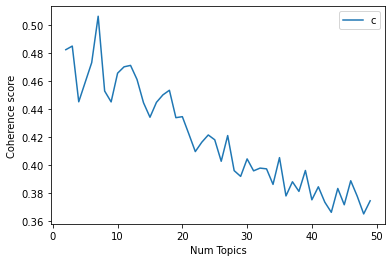

In [ ]:
# Show graph indicate the change of coherence value for each cluster
import matplotlib.pyplot as plt
%matplotlib inline

limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
## https://github.com/maria-antoniak/little-mallet-wrapper/
## https://maria-antoniak.github.io/2022/07/27/topic-modeling-for-the-people.html

from collections import defaultdict
from datetime import datetime
import math
from operator import itemgetter
import os
import random
import re

import numpy as np
import pandas as pd

%matplotlib inline

import little_mallet_wrapper as lmw

path_to_mallet = 'path/to/mallet-2.0.8/mallet-2.0.8\bin/mallet'
output_directory_path = 'path/to/Data/' # change this to your directory for results

training_data = [lmw.process_string(t) for t in df['issue_content'].tolist()]
training_data = [d for d in training_data if d.strip()]
training_data = [data.encode('utf-8') for data in training_data]
training_data = [str(data) for data in training_data]

lmw.print_dataset_stats(training_data)

Number of Documents: 6425
Mean Number of Words per Document: 39.5
Vocabulary Size: 25563


In [ ]:
num_topics = max_topic
topic_keys, topic_distributions = lmw.quick_train_topic_model(path_to_mallet, output_directory_path,num_topics,training_data)

Importing data...
Complete
Training topic model...
Complete


In [ ]:
#assert(len(topic_distributions) == len(training_data))
print(topic_keys)

for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:30]))

for p, d in lmw.get_top_docs(training_data, topic_distributions, topic_index=0, n=3):
    print(round(p, 4), d)
    print()

[['jupyterlab', 'version', 'error', 'output', 'extension', 'browser', 'following', 'build', 'run', 'install', 'server', 'running', 'command', 'lab', 'work', 'reproduce', 'system', 'installed', 'problem', 'description'], ['conda', 'forge', 'bin', 'users', 'envs', 'pyenv', 'test', 'lib', 'miniconda', 'xxx', 'opt', 'windows', 'files', 'program', 'version', 'pyhdedab', 'client', 'packages', 'usr', 'file'], ['labapp', 'token', 'api', 'connection', 'authenticated', 'aepting', 'lab', 'local', 'kernels', 'home', 'kernel', 'jupyternotebookconfig', 'mike', 'static', 'anaconda', 'path', 'share', 'tmp', 'components', 'contents'], ['behavior', 'link', 'describe', 'issue', 'expected', 'browser', 'current', 'bug', 'web', 'drive', 'use', 'error', 'click', 'share', 'file', 'usage', 'button', 'report', 'shareable', 'reproduces'], ['code', 'data', 'widget', 'library', 'use', 'font', 'read', 'widgets', 'size', 'react', 'email', 'date', 'undefined', 'api', 'csv', 'interface', 'html', 'address', 'ipython', 

In [ ]:
# num_topics = max_topic  # Change this to your result number of topics which has highest coherence value or any other prefererred number

path_to_training_data           = output_directory_path + '/trainingNotebookProjects.txt'
path_to_formatted_training_data = output_directory_path + '/mallet.trainingNotebookProjects'
path_to_model                   = output_directory_path + '/mallet.modelNotebookProjects.' + str(num_topics)
path_to_topic_keys              = output_directory_path + '/mallet.topic_keysNotebookProjects.' + str(num_topics)
path_to_topic_distributions     = output_directory_path + '/mallet.topic_distributionsNotebookProjects.' + str(num_topics)
path_to_word_weights            = output_directory_path + '/mallet.word_weightsNotebookProjects.' + str(num_topics)
path_to_diagnostics             = output_directory_path + '/mallet.diagnosticsNotebookProjects.' + str(num_topics) + '.xml'

In [ ]:
lmw.import_data(path_to_mallet,
                path_to_training_data,
                path_to_formatted_training_data,
                training_data)

Importing data...
Complete


In [ ]:
lmw.train_topic_model(path_to_mallet,
                      path_to_formatted_training_data,
                      path_to_model,
                      path_to_topic_keys,
                      path_to_topic_distributions,
                      path_to_word_weights,
                      path_to_diagnostics,
                      num_topics)

Training topic model...
Complete


In [ ]:
topic_keys = lmw.load_topic_keys(output_directory_path + '/mallet.topic_keysNotebookProjects.' + str(num_topics))

for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:30]))

0 	 npm file packages usr install anaconda local lib node self error module notice run import err modules pip libsite build
1 	 com extension blob extensions packages use package issues src like widget master version pull need release documentation html docs add
2 	 questions self drive issue web browser report bug reproduces containedthat forhttpresearchcom error researchcom tagged aboutusage usecom code link gpu tensorflow
3 	 com githubusercontent images png imageuser gif theme assets screen issue screenshot dark cell bug shot following code screenshots image plot
4 	 project smc file sage course projects page files use chat code user problem time button student broken add maybe work
5 	 file error kernel open browser directory files run running version following server terminal new work message folder path issue working
6 	 cell file tab text editor code output new menu open cells line right command markdown like click button work browser
